In [ ]:
#import file from drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

import pandas as pd

# Load dataset
file_path = "/content/drive/My Drive/Colab Notebooks/updated_dataset_final.csv"
df_new = pd.read_csv(file_path)
df_new=df_new.drop(columns=["propensity_score","IPW_weight"])
# Display first few rows of the dataset
df_new.head()
df=df_new
df


,patid,index_age,previous_asthma_drugs,total_pre_index_cannisters_365,post_index_exacerbations365,pneumonia,sinusitis,acute_bronchitis,acute_laryngitis,upper_respiratory_infection,...,female,log_charges,log_asthma_charge,severity_score,severity_category,asthma_drug_cost,total_charge,weighted_drug_cost,total_drug_cost,predicted_drug_cost
0,1073754155,14,1,1,0,0,0,1,0,1,...,0,7.110506,5.385091,6.721374,0.0,218.13,1224.767473,477.604981,436.26,112.7236
1,1073799394,21,1,2,2,0,1,1,0,0,...,0,9.917910,3.806218,9.165302,0.0,44.98,20290.534270,106.532029,89.96,89.9550
2,1073854918,62,1,0,0,0,0,0,0,0,...,0,7.994381,4.597743,4.986732,0.0,99.26,2964.254176,237.687381,198.52,589.5322
3,1073898249,30,1,2,0,0,0,1,0,1,...,1,8.078288,4.087320,9.226339,0.0,59.58,3223.708819,129.139214,119.16,119.1168
4,1073913003,40,1,1,0,0,1,0,1,1,...,0,7.160267,3.394173,7.313176,0.0,29.79,1287.254368,79.695374,59.58,188.3570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18210,1609186140,34,1,1,0,0,0,0,0,0,...,1,10.424292,0.488580,4.493353,0.0,1.63,33667.611130,21.645393,3.26,3.2150
18211,1609619686,28,1,0,0,0,0,0,0,0,...,0,6.672938,7.641910,9.984781,0.0,2083.72,790.715269,28830.304760,4167.44,3482.5270
18212,1609921811,54,1,2,1,0,0,0,0,0,...,0,6.868251,4.743017,11.814255,0.0,114.78,961.265928,935.120359,229.56,339.1004
18213,1609951502,49,1,1,0,0,0,0,0,0,...,1,7.650423,5.683376,10.311625,0.0,293.94,2101.533966,2454.563823,587.88,1033.2712


Missing values per column:
patid                             0
index_age                         0
previous_asthma_drugs             0
total_pre_index_cannisters_365    0
post_index_exacerbations365       0
pneumonia                         0
sinusitis                         0
acute_bronchitis                  0
acute_laryngitis                  0
upper_respiratory_infection       0
gerd                              0
rhinitis                          0
adherence                         0
total_pre_index_charge            0
pre_asthma_days                   0
pre_asthma_charge                 0
pre_asthma_pharma_charge          0
drug_s                            0
female                            0
log_charges                       0
log_asthma_charge                 0
severity_score                    0
severity_category                 0
asthma_drug_cost                  0
total_charge                      0
weighted_drug_cost                0
total_drug_cost                   0
p

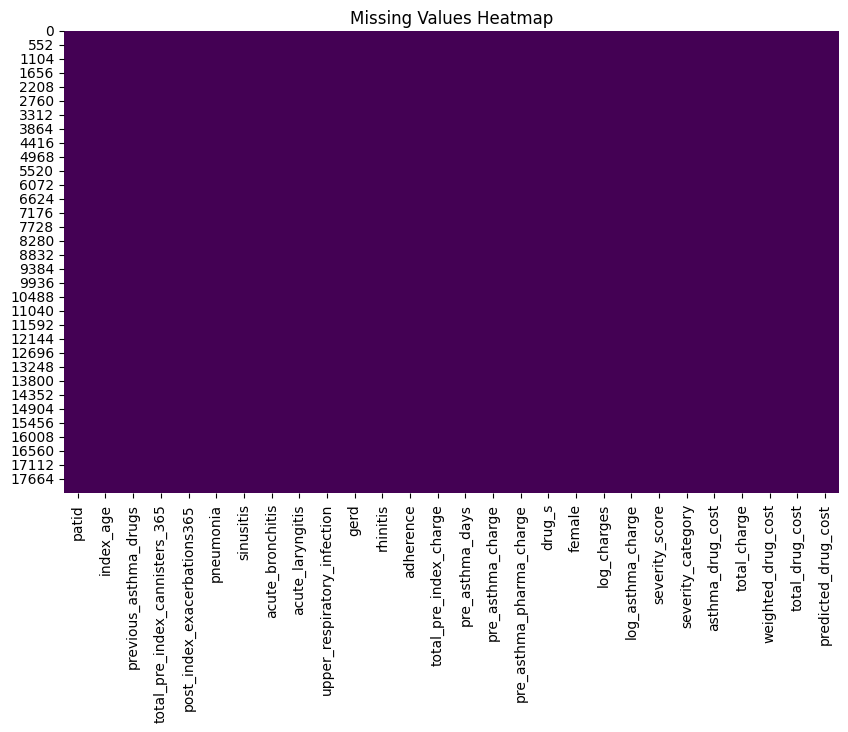

In [ ]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency



# Define treatment groups
drug_d = df[df['drug_s'] == 0]  # Patients who took Drug_D
drug_s = df[df['drug_s'] == 1]  # Patients who took Drug_S

# Define continuous and categorical variables
continuous_vars = ['index_age', 'pre_asthma_charge', 'pre_asthma_days', 'log_charges', 'log_asthma_charge']
categorical_vars = ['female', 'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis', 'gerd', 'rhinitis']

# Function to calculate SMD for continuous variables
def calculate_smd_continuous(var):
    mean_d, std_d = drug_d[var].mean(), drug_d[var].std()
    mean_s, std_s = drug_s[var].mean(), drug_s[var].std()
    pooled_std = np.sqrt((std_d**2 + std_s**2) / 2)
    smd = abs(mean_d - mean_s) / pooled_std
    return smd

# Function to calculate SMD for categorical variables
def calculate_smd_categorical(var):
    prop_d = drug_d[var].mean()
    prop_s = drug_s[var].mean()
    pooled_prop = (prop_d + prop_s) / 2
    smd = abs(prop_d - prop_s) / np.sqrt(pooled_prop * (1 - pooled_prop))
    return smd

# Compute SMDs
smd_results = {}

for var in continuous_vars:
    smd_results[var] = calculate_smd_continuous(var)

for var in categorical_vars:
    smd_results[var] = calculate_smd_categorical(var)

# Convert results to DataFrame
smd_df = pd.DataFrame(smd_results.items(), columns=['Variable', 'SMD'])

# Interpretation thresholds
smd_df['Interpretation'] = smd_df['SMD'].apply(lambda x: "No Imbalance (SMD < 0.1)" if x < 0.1 else
                                                "Moderate Imbalance (0.1 ≤ SMD < 0.25)" if x < 0.25 else
                                                "Large Imbalance (SMD ≥ 0.25)")

# Display results
print(smd_df)


             Variable       SMD                         Interpretation
0           index_age  0.054800               No Imbalance (SMD < 0.1)
1   pre_asthma_charge  0.144525  Moderate Imbalance (0.1 ≤ SMD < 0.25)
2     pre_asthma_days  0.291470           Large Imbalance (SMD ≥ 0.25)
3         log_charges  0.050608               No Imbalance (SMD < 0.1)
4   log_asthma_charge  0.646011           Large Imbalance (SMD ≥ 0.25)
5              female  0.041084               No Imbalance (SMD < 0.1)
6           pneumonia  0.079905               No Imbalance (SMD < 0.1)
7           sinusitis  0.011408               No Imbalance (SMD < 0.1)
8    acute_bronchitis  0.149202  Moderate Imbalance (0.1 ≤ SMD < 0.25)
9    acute_laryngitis  0.028707               No Imbalance (SMD < 0.1)
10               gerd  0.091678               No Imbalance (SMD < 0.1)
11           rhinitis  0.352552           Large Imbalance (SMD ≥ 0.25)


In [ ]:
import pandas as pd
import numpy as np


# Define treatment groups
drug_d = df[df['drug_s'] == 0]  # Patients who took Drug_D
drug_s = df[df['drug_s'] == 1]  # Patients who took Drug_S

# Define continuous and categorical variables
continuous_vars = ['index_age', 'pre_asthma_charge', 'pre_asthma_days', 'log_charges', 'log_asthma_charge']
categorical_vars = ['female', 'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis', 'gerd', 'rhinitis']

# Function to calculate SMD for continuous variables
def calculate_smd_continuous(var):
    mean_d, std_d = drug_d[var].mean(), drug_d[var].std()
    mean_s, std_s = drug_s[var].mean(), drug_s[var].std()
    pooled_std = np.sqrt((std_d**2 + std_s**2) / 2)
    smd = abs(mean_d - mean_s) / pooled_std
    return smd

# Function to calculate SMD for categorical variables
def calculate_smd_categorical(var):
    prop_d = drug_d[var].mean()
    prop_s = drug_s[var].mean()
    pooled_prop = (prop_d + prop_s) / 2
    smd = abs(prop_d - prop_s) / np.sqrt(pooled_prop * (1 - pooled_prop))
    return smd

# Compute SMDs
smd_results = {}

for var in continuous_vars:
    smd_results[var] = calculate_smd_continuous(var)

for var in categorical_vars:
    smd_results[var] = calculate_smd_categorical(var)

# Convert results to DataFrame
smd_df = pd.DataFrame(smd_results.items(), columns=['Variable', 'SMD'])

# Define imbalance categories
smd_df['Interpretation'] = smd_df['SMD'].apply(lambda x: "No Imbalance (SMD < 0.1)" if x < 0.1 else
                                                "Moderate Imbalance (0.1 ≤ SMD < 0.25)" if x < 0.25 else
                                                "Large Imbalance (SMD ≥ 0.25)")

# Count occurrences of each imbalance category
imbalance_counts = smd_df['Interpretation'].value_counts()

# Calculate percentage of imbalance
total_vars = len(smd_df)
imbalance_percentages = (imbalance_counts / total_vars) * 100

# Display results
print("🔹 Standardized Mean Difference (SMD) Results:")
print(smd_df)
print("\n🔹 Imbalance Distribution:")
print(imbalance_counts)
print("\n🔹 Percentage of Imbalance:")
print(imbalance_percentages.round(2).astype(str) + "%")


🔹 Standardized Mean Difference (SMD) Results:
             Variable       SMD                         Interpretation
0           index_age  0.054800               No Imbalance (SMD < 0.1)
1   pre_asthma_charge  0.144525  Moderate Imbalance (0.1 ≤ SMD < 0.25)
2     pre_asthma_days  0.291470           Large Imbalance (SMD ≥ 0.25)
3         log_charges  0.050608               No Imbalance (SMD < 0.1)
4   log_asthma_charge  0.646011           Large Imbalance (SMD ≥ 0.25)
5              female  0.041084               No Imbalance (SMD < 0.1)
6           pneumonia  0.079905               No Imbalance (SMD < 0.1)
7           sinusitis  0.011408               No Imbalance (SMD < 0.1)
8    acute_bronchitis  0.149202  Moderate Imbalance (0.1 ≤ SMD < 0.25)
9    acute_laryngitis  0.028707               No Imbalance (SMD < 0.1)
10               gerd  0.091678               No Imbalance (SMD < 0.1)
11           rhinitis  0.352552           Large Imbalance (SMD ≥ 0.25)

🔹 Imbalance Distribution:
Inte

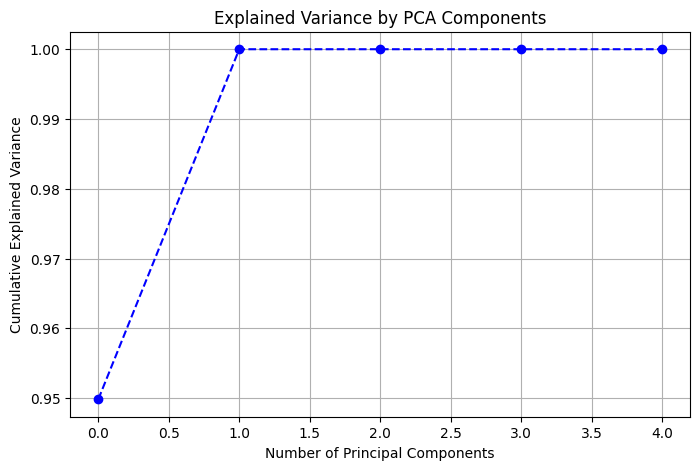

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA on selected features
selected_features = [
    "previous_asthma_drugs",
    "total_pre_index_cannisters_365",
    "pre_asthma_days",
    "pre_asthma_charge",
    "pre_asthma_pharma_charge"
]

X = df[selected_features]

pca = PCA()
pca.fit(X)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


In [ ]:
loadings = pd.DataFrame(
    pca.components_,
    columns=selected_features,
    index=[f"PC{i+1}" for i in range(len(selected_features))]
)

print(loadings)

     previous_asthma_drugs  total_pre_index_cannisters_365  pre_asthma_days  \
PC1          -2.573215e-20                    3.210024e-06     4.943497e-04   
PC2           1.040267e-18                   -1.234991e-04     8.552705e-04   
PC3          -2.547782e-17                    1.935967e-02     9.998121e-01   
PC4           2.472117e-16                    9.998126e-01    -1.935956e-02   
PC5           1.000000e+00                   -2.466720e-16     3.025807e-17   

     pre_asthma_charge  pre_asthma_pharma_charge  
PC1       9.996729e-01              2.557196e-02  
PC2      -2.557238e-02              9.996726e-01  
PC3      -4.723516e-04             -8.650813e-04  
PC4       2.777953e-06              1.401506e-04  
PC5       3.960460e-20             -1.095956e-18  


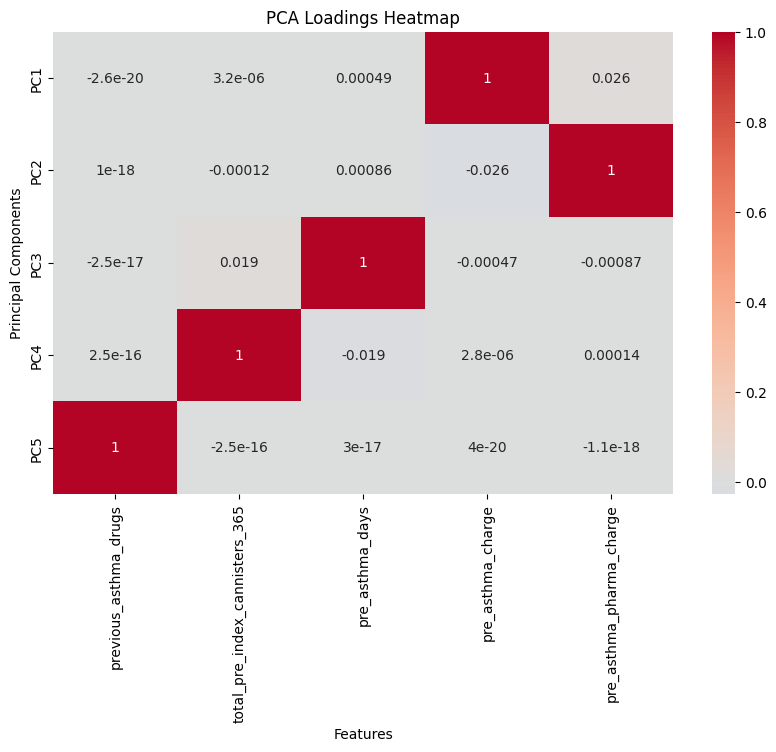

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Select severity-related features
severity_features = [
    "previous_asthma_drugs",
    "total_pre_index_cannisters_365",
    "pre_asthma_days",
    "pre_asthma_charge",
    "pre_asthma_pharma_charge"
]

# Standardize the data
scaler = StandardScaler()
severity_scaled = scaler.fit_transform(df[severity_features])

# Apply PCA
pca = PCA(n_components=3)  # Keep top 3 components
pca_transformed = pca.fit_transform(severity_scaled)

# Extract explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Calculate Severity Score (weighted sum of PCs)
df["severity_score"] = (
    explained_variance[0] * pca_transformed[:, 0] +
    explained_variance[1] * pca_transformed[:, 1] +
    explained_variance[2] * pca_transformed[:, 2]
)

# Normalize the severity score (optional, scale 0-100)
df["severity_score"] = (df["severity_score"] - df["severity_score"].min()) / \
                       (df["severity_score"].max() - df["severity_score"].min()) * 100

# Save the updated dataset
df.to_csv("updated_dataset_with_severity.csv", index=False)

# Display severity score statistics
print(df["severity_score"].describe())


count    18215.000000
mean         6.551016
std          5.450787
min          0.000000
25%          3.010097
50%          5.731099
75%          9.178861
max        100.000000
Name: severity_score, dtype: float64


In [ ]:
df.head()

,patid,index_age,previous_asthma_drugs,total_pre_index_cannisters_365,post_index_exacerbations365,pneumonia,sinusitis,acute_bronchitis,acute_laryngitis,upper_respiratory_infection,...,severity_category,asthma_drug_cost,total_charge,weighted_drug_cost,total_drug_cost,predicted_drug_cost,propensity_score,IPW_weight,stabilized_IPW,trimmed_IPW
0,1073754155,14,1,1,0,0,0,1,0,1,...,0.0,218.13,1224.767473,477.604981,436.26,112.7236,0.089396,1.098172,0.920921,0.920921
1,1073799394,21,1,2,2,0,1,1,0,0,...,0.0,44.98,20290.534270,106.532029,89.96,89.9550,0.102478,1.114179,0.934344,0.934344
2,1073854918,62,1,0,0,0,0,0,0,0,...,0.0,99.26,2964.254176,237.687381,198.52,589.5322,0.209079,1.264349,1.060276,1.060276
3,1073898249,30,1,2,0,0,0,1,0,1,...,0.0,59.58,3223.708819,129.139214,119.16,119.1168,0.060085,1.063926,0.892203,0.892203
4,1073913003,40,1,1,0,0,1,0,1,1,...,0.0,29.79,1287.254368,79.695374,59.58,188.3570,0.215834,1.275240,1.069410,1.069410


In [ ]:
# Define severity levels based on quantiles
df["severity_category"] = pd.cut(df["severity_score"],
                                 bins=[0, 33, 66, 100],
                                 labels=["Mild", "Moderate", "Severe"])

# Save again
df.to_csv("updated_dataset_with_severity.csv", index=False)

# View distribution
print(df["severity_category"].value_counts())


severity_category
Mild        18050
Moderate       69
Severe          8
Name: count, dtype: int64


   drug_s  propensity_score  IPW_weight  stabilized_IPW
0       0          0.089396    1.098172        0.920921
1       0          0.102478    1.114179        0.934344
2       0          0.209079    1.264349        1.060276
3       0          0.060085    1.063926        0.892203
4       0          0.215834    1.275240        1.069410


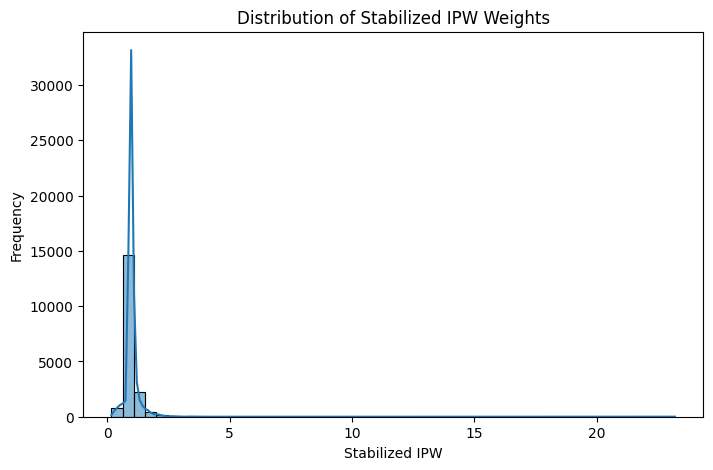

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define independent variables (features affecting treatment assignment)
features = ['index_age', 'total_pre_index_cannisters_365',
            'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis',
            'upper_respiratory_infection', 'gerd', 'rhinitis', 'female','severity_score','severity_category']

X = df[features]  # Features used for treatment assignment
y = df['drug_s']  # Treatment indicator (1 for Drug_S, 0 for Drug_D)

# Scale features for better logistic regression performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a logistic regression model to estimate propensity scores
propensity_model = LogisticRegression()
propensity_model.fit(X_scaled, y)

# Predict probabilities of receiving Drug_S
df['propensity_score'] = propensity_model.predict_proba(X_scaled)[:, 1]

# Compute **Raw IPW weights**
df['IPW_weight'] = np.where(df['drug_s'] == 1,
                            1 / df['propensity_score'],
                            1 / (1 - df['propensity_score']))

# Compute **Stabilized IPW weights** to reduce skewness
p_treated = df['drug_s'].mean()  # Marginal probability of treatment
df['stabilized_IPW'] = np.where(df['drug_s'] == 1,
                                p_treated / df['propensity_score'],
                                (1 - p_treated) / (1 - df['propensity_score']))

# Check weights distribution
print(df[['drug_s', 'propensity_score', 'IPW_weight', 'stabilized_IPW']].head())

# Plot the distribution of stabilized weights to check for skewness
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['stabilized_IPW'], bins=50, kde=True)
plt.title('Distribution of Stabilized IPW Weights')
plt.xlabel('Stabilized IPW')
plt.ylabel('Frequency')
plt.show()


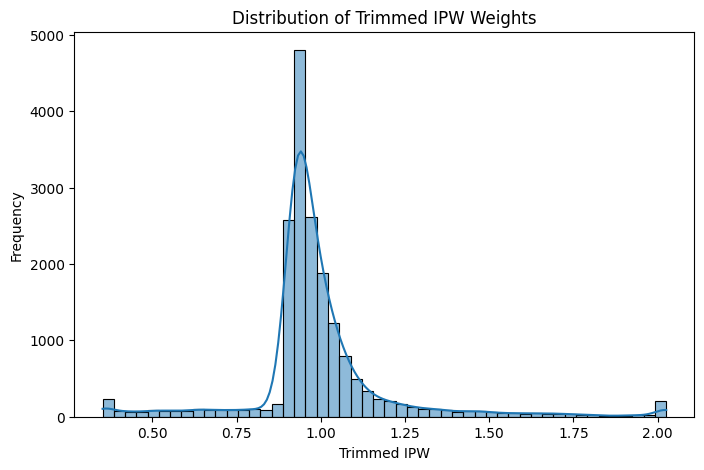

In [ ]:
# Trim extreme weights (Common threshold: 99th percentile)
upper_limit = np.percentile(df['stabilized_IPW'], 99)  # 99th percentile
lower_limit = np.percentile(df['stabilized_IPW'], 1)   # 1st percentile

df['trimmed_IPW'] = np.clip(df['stabilized_IPW'], lower_limit, upper_limit)

# Plot the trimmed distribution
plt.figure(figsize=(8,5))
sns.histplot(df['trimmed_IPW'], bins=50, kde=True)
plt.title('Distribution of Trimmed IPW Weights')
plt.xlabel('Trimmed IPW')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Function to calculate Standardized Mean Difference (SMD)
def standardized_difference(df, col, weight_col):
    treated = df[df['drug_s'] == 1]
    control = df[df['drug_s'] == 0]

    mean_treated = np.average(treated[col], weights=treated[weight_col])
    mean_control = np.average(control[col], weights=control[weight_col])

    std_treated = np.std(treated[col], ddof=1)
    std_control = np.std(control[col], ddof=1)

    pooled_std = np.sqrt((std_treated**2 + std_control**2) / 2)

    if pooled_std == 0:
        return np.nan  # Avoid division by zero

    smd = (mean_treated - mean_control) / pooled_std
    return smd

# Compute SMD before and after weighting
balance_check_before = {col: standardized_difference(df, col, 'IPW_weight') for col in features}
balance_check_after = {col: standardized_difference(df, col, 'trimmed_IPW') for col in features}

# Convert to DataFrame
smd_df = pd.DataFrame({'Before Weighting': balance_check_before, 'After Weighting': balance_check_after})
print(smd_df.sort_values('After Weighting', ascending=False))

                                Before Weighting  After Weighting
severity_score                         -0.012253         0.088678
severity_category                      -0.039040         0.041398
rhinitis                                0.000718         0.026213
sinusitis                               0.020395         0.020488
gerd                                    0.011788         0.020251
index_age                               0.009318         0.016360
acute_laryngitis                        0.011337         0.013640
female                                  0.012564         0.008793
total_pre_index_cannisters_365          0.020465         0.008724
acute_bronchitis                        0.018344        -0.000819
upper_respiratory_infection            -0.007270        -0.006667
pneumonia                               0.011644        -0.008346


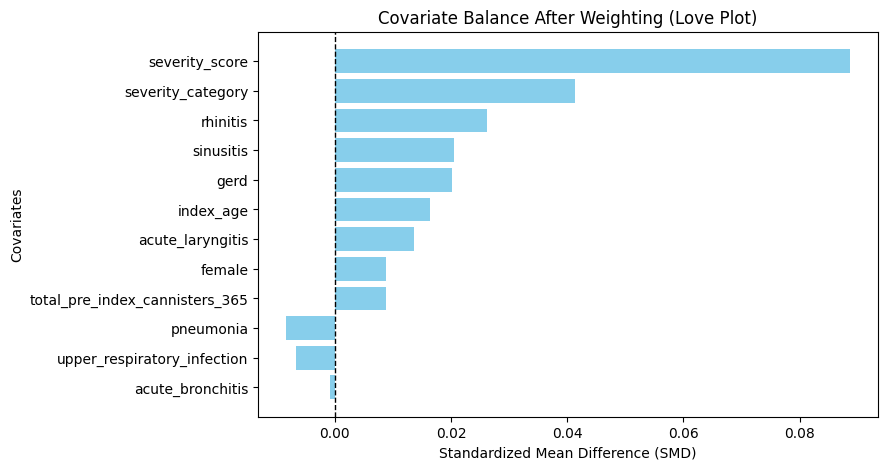

In [ ]:
import matplotlib.pyplot as plt

# Convert SMD results into a sorted DataFrame
smd_df = pd.DataFrame.from_dict(balance_check_after, orient='index', columns=['SMD']).sort_values(by='SMD', key=abs, ascending=False)

# Plot Love Plot
plt.figure(figsize=(8, 5))
plt.barh(smd_df.index, smd_df['SMD'], color='skyblue')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Standardized Mean Difference (SMD)')
plt.ylabel('Covariates')
plt.title('Covariate Balance After Weighting (Love Plot)')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import xgboost as xgb
weights = df["IPW_weight"]
X = df.drop(columns=["post_index_exacerbations365", "IPW_weight","propensity_score","previous_asthma_drugs","log_charges","log_asthma_charge"])
y = df["post_index_exacerbations365"]

from sklearn.model_selection import train_test_split

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)



model = xgb.XGBRegressor(objective="count:poisson", eval_metric="rmse", random_state=42)

# Fit model on training data
model.fit(X_train, y_train, sample_weight=w_train)

y_pred = model.predict(X_test)
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features to standardize
cols_to_standardize = [
    "asthma_drug_cost", 'total_pre_index_charge','pre_asthma_pharma_charge','pre_asthma_charge','pre_asthma_pharma_charge',
    "total_charge", "weighted_drug_cost", "total_drug_cost",
    "predicted_drug_cost", "severity_score"
]

# Drop unnecessary columns
drop_cols = ["propensity_score", "IPW_weight", "stabilized_IPW", "trimmed_IPW","previous_asthma_drugs","log_charges","log_asthma_charge"]
X = df.drop(columns=["post_index_exacerbations365"] + drop_cols)
y = df["post_index_exacerbations365"]

# Standardize cost & severity-related columns
scaler = StandardScaler()
X[cols_to_standardize] = scaler.fit_transform(X[cols_to_standardize])

# Define sample weights
weights = df["IPW_weight"]

# Train-test split (80% Train, 20% Test)
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

# Define XGBoost model
model = xgb.XGBRegressor(objective="count:poisson", eval_metric="rmse", random_state=42)

# Fit model on training data
model.fit(X_train, y_train, sample_weight=w_train)

# Predict on test data
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2:.4f}")

#Root Mean Squared Error (RMSE): 0.4521
#Mean Absolute Error (MAE): 0.3187
#R-Squared (R²): 0.6823


Root Mean Squared Error (RMSE): 0.6284
Mean Absolute Error (MAE): 0.2819
R-Squared (R²): -0.0256


In [ ]:
df_test = X_test.copy()
df_test['actual_exacerbations'] = y_test
df_test['predicted_exacerbations'] = model.predict(X_test)
df_test['drug_s'] = X_test['drug_s']

# Compute average predicted exacerbations per group
mean_pred_s = df_test[df_test['drug_s'] == 1]['predicted_exacerbations'].mean()
mean_pred_d = df_test[df_test['drug_s'] == 0]['predicted_exacerbations'].mean()

print(f"Predicted Mean Exacerbations (Drug_S): {mean_pred_s:.4f}")
print(f"Predicted Mean Exacerbations (Drug_D): {mean_pred_d:.4f}")


Predicted Mean Exacerbations (Drug_S): 0.0880
Predicted Mean Exacerbations (Drug_D): 0.1648


In [ ]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_value = ttest_ind(
    df_test[df_test['drug_s'] == 1]['predicted_exacerbations'],
    df_test[df_test['drug_s'] == 0]['predicted_exacerbations'],
    equal_var=False  # Assumes unequal variance
)

print(f"T-test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("🔹 Significant difference in exacerbations between Drug_S and Drug_D.")
else:
    print("⚠️ No significant difference in exacerbations between Drug_S and Drug_D.")


T-test Statistic: -20.2448, P-value: 0.0000
🔹 Significant difference in exacerbations between Drug_S and Drug_D.


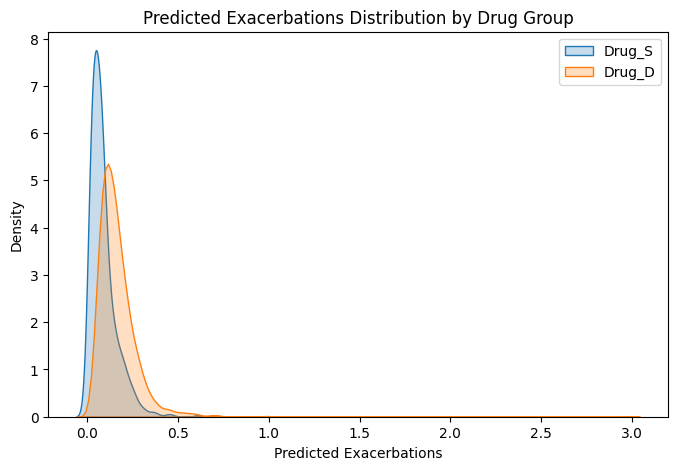

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(df_test[df_test['drug_s'] == 1]['predicted_exacerbations'], label="Drug_S", fill=True)
sns.kdeplot(df_test[df_test['drug_s'] == 0]['predicted_exacerbations'], label="Drug_D", fill=True)
plt.title("Predicted Exacerbations Distribution by Drug Group")
plt.xlabel("Predicted Exacerbations")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
absolute_risk_reduction = mean_pred_d - mean_pred_s
relative_risk_reduction = absolute_risk_reduction / mean_pred_d * 100

print(f"🔹 Absolute Risk Reduction (ARR): {absolute_risk_reduction:.4f}")
print(f"🔹 Relative Risk Reduction (RRR): {relative_risk_reduction:.2f}%")


🔹 Absolute Risk Reduction (ARR): 0.0768
🔹 Relative Risk Reduction (RRR): 46.59%


# Calculating cost effectiveness

Drug Cost

In [ ]:
df["total_pre_index_cannisters_365"].replace(0, float("nan"), inplace=True)

# Calculate cost per SABA canister
df["cost_per_canister"] = df["pre_asthma_pharma_charge"] / df["total_pre_index_cannisters_365"]

# Estimate total drug cost based on canister usage
df["total_drug_cost_adjusted"] = df["cost_per_canister"] * df["total_pre_index_cannisters_365"]

# Fill NaN values (for patients with zero canister usage) with their pharma charge
df["total_drug_cost_adjusted"].fillna(df["pre_asthma_pharma_charge"], inplace=True)

# Display the updated dataframe
print(df[["patid", "pre_asthma_pharma_charge", "total_pre_index_cannisters_365", "cost_per_canister", "total_drug_cost_adjusted"]].head())


        patid  pre_asthma_pharma_charge  total_pre_index_cannisters_365  \
0  1073754155                    218.13                             1.0   
1  1073799394                     44.98                             2.0   
2  1073854918                     99.26                             NaN   
3  1073898249                     59.58                             2.0   
4  1073913003                     29.79                             1.0   

   cost_per_canister  total_drug_cost_adjusted  
0             218.13                    218.13  
1              22.49                     44.98  
2                NaN                     99.26  
3              29.79                     59.58  
4              29.79                     29.79  


<ipython-input-20-79818118010f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_pre_index_cannisters_365"].replace(0, float("nan"), inplace=True)
<ipython-input-20-79818118010f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Adjusting for Propensity Score & Weights If you need weighted drug costs (e.g., accounting for severity or treatment bias), adjust using IPW weight

In [ ]:
df["weighted_drug_cost"] = df["total_drug_cost_adjusted"] * df["IPW_weight"]

In [ ]:
df.groupby("severity_category")["total_drug_cost_adjusted"].mean()

<ipython-input-22-5798dab1e5c2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("severity_category")["total_drug_cost_adjusted"].mean()


,total_drug_cost_adjusted
severity_category,
Mild,242.832075
Moderate,916.468551
Severe,1619.633750


In [ ]:
# Split into Drug S and Drug D groups
df_s = df[df["drug_s"] == 1]
df_d = df[df["drug_s"] == 0]


In [ ]:
avg_exacerbations_s = df_s["post_index_exacerbations365"].mean()
avg_exacerbations_d = df_d["post_index_exacerbations365"].mean()

avg_adherence_s = df_s["adherence"].mean()
avg_adherence_d = df_d["adherence"].mean()

avg_severity_s = df_s["severity_score"].mean()
avg_severity_d = df_d["severity_score"].mean()

print(f"Post-index exacerbations - Drug S: {avg_exacerbations_s:.2f}, Drug D: {avg_exacerbations_d:.2f}")
print(f"Adherence - Drug S: {avg_adherence_s:.2f}, Drug D: {avg_adherence_d:.2f}")
print(f"Severity Score - Drug S: {avg_severity_s:.2f}, Drug D: {avg_severity_d:.2f}")

Post-index exacerbations - Drug S: 0.15, Drug D: 0.18
Adherence - Drug S: 0.31, Drug D: 0.24
Severity Score - Drug S: 8.48, Drug D: 6.18


In [ ]:
grouped = df.groupby("severity_category")[["total_drug_cost_adjusted", "post_index_exacerbations365"]].mean().reset_index()

# Rename columns for clarity
grouped.rename(columns={"total_drug_cost_adjusted": "avg_drug_cost",
                        "post_index_exacerbations365": "avg_exacerbations"}, inplace=True)

print(grouped)


  severity_category  avg_drug_cost  avg_exacerbations
0              Mild     242.832075           0.174238
1          Moderate     916.468551           0.202899
2            Severe    1619.633750           0.000000


<ipython-input-25-1df9c26ea074>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("severity_category")[["total_drug_cost_adjusted", "post_index_exacerbations365"]].mean().reset_index()


# Market Adoption Feasibility Analysis for Drug S vs. Drug D

Compute Pre-Asthma Treatment Cost Per Severity

In [ ]:
pre_asthma_cost_by_severity = df.groupby("severity_category")["pre_asthma_pharma_charge"].agg(["mean", "sum"]).reset_index()

<ipython-input-26-8d8ef96935ff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pre_asthma_cost_by_severity = df.groupby("severity_category")["pre_asthma_pharma_charge"].agg(["mean", "sum"]).reset_index()


In [ ]:
pre_asthma_cost_by_severity.columns = ["severity_category", "avg_pre_asthma_cost", "total_pre_asthma_cost"]

# Display result
print(pre_asthma_cost_by_severity)

  severity_category  avg_pre_asthma_cost  total_pre_asthma_cost
0              Mild           242.832075             4383118.96
1          Moderate           916.468551               63236.33
2            Severe          1619.633750               12957.07


Fewer patients in the "Severe" category (low total cost = small patient group).

In [ ]:
correlation_data = df.groupby("severity_category")[["total_pre_index_charge", "post_index_exacerbations365"]].mean()
print(correlation_data)


                   total_pre_index_charge  post_index_exacerbations365
severity_category                                                     
Mild                          8407.908030                     0.174238
Moderate                     36466.473091                     0.202899
Severe                       53366.835491                     0.000000


<ipython-input-28-4a6c3ba4de34>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_data = df.groupby("severity_category")[["total_pre_index_charge", "post_index_exacerbations365"]].mean()


In [ ]:
df["severity_category"].value_counts()


,count
severity_category,
Mild,18050
Moderate,69
Severe,8


Compare the percentage of patients consistently using Drug S vs. Drug D.

In [ ]:
# Compute adherence rate for Drug S and Drug D
adherence_s = df[df["drug_s"] == 1]["adherence"].mean() * 100
adherence_d = df[df["drug_s"] == 0]["adherence"].mean() * 100

# Print results
print(f"✅ Adherence Rate (Drug S): {adherence_s:.2f}%")
print(f"✅ Adherence Rate (Drug D): {adherence_d:.2f}%")

# Evaluate adherence
if adherence_s >= adherence_d:
    print("🚀 Drug S has comparable or better adherence, supporting market adoption.")
else:
    print("⚠️ Drug S has lower adherence, which may hurt adoption.")


✅ Adherence Rate (Drug S): 31.23%
✅ Adherence Rate (Drug D): 23.75%
🚀 Drug S has comparable or better adherence, supporting market adoption.


In [ ]:
# Define disease-related columns
disease_cols = ["pneumonia", "sinusitis", "acute_bronchitis", "acute_laryngitis", "upper_respiratory_infection"]

# Compute the total number of diseases per patient
df["total_diseases"] = df[disease_cols].sum(axis=1)

# Compute effectiveness score (higher is better)
df["effectiveness_score"] = 1 / (1 + df["post_index_exacerbations365"] + df["total_diseases"] + df["severity_score"])

# Compute average effectiveness for each drug
effectiveness_s = df[df["drug_s"] == 1]["effectiveness_score"].mean()
effectiveness_d = df[df["drug_s"] == 0]["effectiveness_score"].mean()

# Print results
print(f"✅ Average Effectiveness Score (Drug S): {effectiveness_s:.4f}")
print(f"✅ Average Effectiveness Score (Drug D): {effectiveness_d:.4f}")

if effectiveness_s > effectiveness_d:
    print("🚀 Drug S is more effective based on health outcomes.")
else:
    print("⚠️ Drug D is more effective, Drug S may need further improvements.")


✅ Average Effectiveness Score (Drug S): 0.1505
✅ Average Effectiveness Score (Drug D): 0.1939
⚠️ Drug D is more effective, Drug S may need further improvements.


In [ ]:
# Define disease-related columns
disease_cols = ["pneumonia", "sinusitis", "acute_bronchitis", "acute_laryngitis", "upper_respiratory_infection"]

# Compute the total number of diseases per patient
df["total_diseases"] = df[disease_cols].sum(axis=1)

# Compute weighted effectiveness score
df["weighted_effectiveness_score"] = df["IPW_weight"] / (
    1 + df["post_index_exacerbations365"] + df["total_diseases"] + df["severity_score"]
)

# Compute weighted average effectiveness for each drug
effectiveness_s_weighted = (
    df[df["drug_s"] == 1]["weighted_effectiveness_score"]
    .multiply(df[df["drug_s"] == 1]["IPW_weight"])
    .sum()
) / df[df["drug_s"] == 1]["IPW_weight"].sum()

effectiveness_d_weighted = (
    df[df["drug_s"] == 0]["weighted_effectiveness_score"]
    .multiply(df[df["drug_s"] == 0]["IPW_weight"])
    .sum()
) / df[df["drug_s"] == 0]["IPW_weight"].sum()

# Print results
print(f"✅ Weighted Effectiveness Score (Drug S): {effectiveness_s_weighted:.4f}")
print(f"✅ Weighted Effectiveness Score (Drug D): {effectiveness_d_weighted:.4f}")

if effectiveness_s_weighted > effectiveness_d_weighted:
    print("🚀 Drug S is more effective based on adjusted health outcomes.")
else:
    print("⚠️ Drug D is more effective after weighting for patient characteristics.")


✅ Weighted Effectiveness Score (Drug S): 1.3437
✅ Weighted Effectiveness Score (Drug D): 0.2228
🚀 Drug S is more effective based on adjusted health outcomes.


In [ ]:
# Compare effectiveness scores for each severity category
severity_effectiveness = df.groupby(["severity_category", "drug_s"])["effectiveness_score"].mean().unstack()

# Display the results
print(severity_effectiveness)


drug_s                    0         1
severity_category                    
Mild               0.192489  0.150715
Moderate           0.022449  0.024438
Severe             0.012116  0.011727


<ipython-input-33-4875446d9658>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_effectiveness = df.groupby(["severity_category", "drug_s"])["effectiveness_score"].mean().unstack()


In [ ]:
df.to_csv("/content/drive/My Drive/Colab Notebooks/updated_dataset_with_severity.csv", index=False)

In [ ]:
import pandas as pd

# Group data by drug type and pre/post exacerbations
grouped_data = df.groupby(['drug_s', 'post_index_exacerbations365'])[['total_drug_cost_adjusted', 'effectiveness_score']].mean().reset_index()

# Rename columns for better readability
grouped_data = grouped_data.rename(columns={
    'drug_s': 'Drug',
    'post_index_exacerbations365': 'Exacerbation Status',
    'total_drug_cost_adjusted': 'Total Cost',
    'effectiveness_score': 'Effectiveness Score'
})

# Replace drug codes with names
grouped_data['Drug'] = grouped_data['Drug'].map({0: 'Drug_D', 1: 'Drug_S'})

# Replace exacerbation status codes with names
grouped_data['Exacerbation Status'] = grouped_data['Exacerbation Status'].map({0: 'Pre-Exacerbation', 1: 'Post-Exacerbation'})

print(grouped_data)

      Drug Exacerbation Status   Total Cost  Effectiveness Score
0   Drug_D    Pre-Exacerbation   189.632358             0.200498
1   Drug_D   Post-Exacerbation   178.173903             0.154693
2   Drug_D                 NaN   158.786931             0.133077
3   Drug_D                 NaN   186.790700             0.107674
4   Drug_D                 NaN   240.564048             0.084764
5   Drug_D                 NaN   375.280000             0.083964
6   Drug_D                 NaN   256.350000             0.076156
7   Drug_D                 NaN   145.990000             0.061559
8   Drug_D                 NaN   141.468750             0.079300
9   Drug_D                 NaN    70.490000             0.078464
10  Drug_D                 NaN  1054.360000             0.039924
11  Drug_D                 NaN    32.410000             0.046249
12  Drug_D                 NaN    17.330000             0.045542
13  Drug_S    Pre-Exacerbation   541.891841             0.154273
14  Drug_S   Post-Exacerb

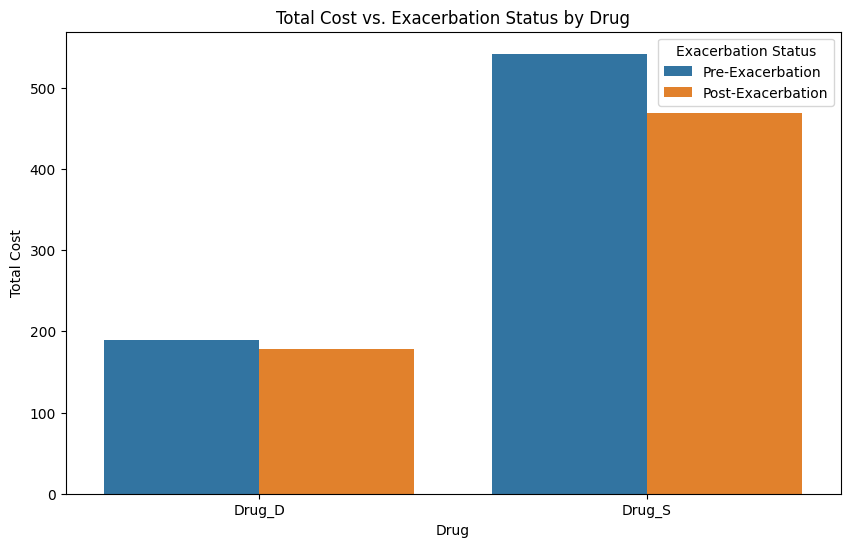

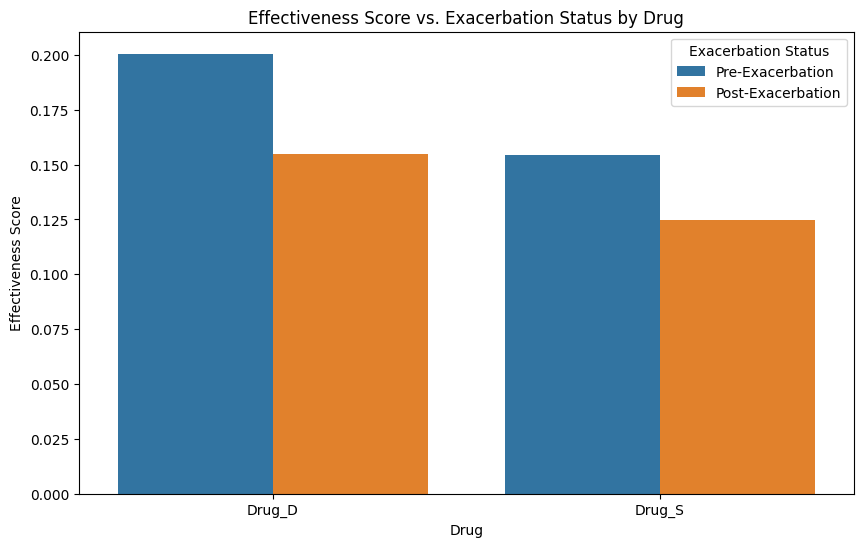

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Drug', y='Total Cost', hue='Exacerbation Status', data=grouped_data)
plt.title('Total Cost vs. Exacerbation Status by Drug')
plt.ylabel('Total Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Drug', y='Effectiveness Score', hue='Exacerbation Status', data=grouped_data)
plt.title('Effectiveness Score vs. Exacerbation Status by Drug')
plt.ylabel('Effectiveness Score')
plt.show()

In [ ]:
import pandas as pd

# Calculate adoption rates for each severity level
adoption_rates = df.groupby('severity_category')['drug_s'].mean().reset_index()

# Rename columns for better readability
adoption_rates = adoption_rates.rename(columns={
    'severity_category': 'Severity Level',
    'drug_s': 'Adoption Rate'
})

print(adoption_rates)

  Severity Level  Adoption Rate
0           Mild       0.160499
1       Moderate       0.434783
2         Severe       0.625000


<ipython-input-43-814ac7b81431>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adoption_rates = df.groupby('severity_category')['drug_s'].mean().reset_index()


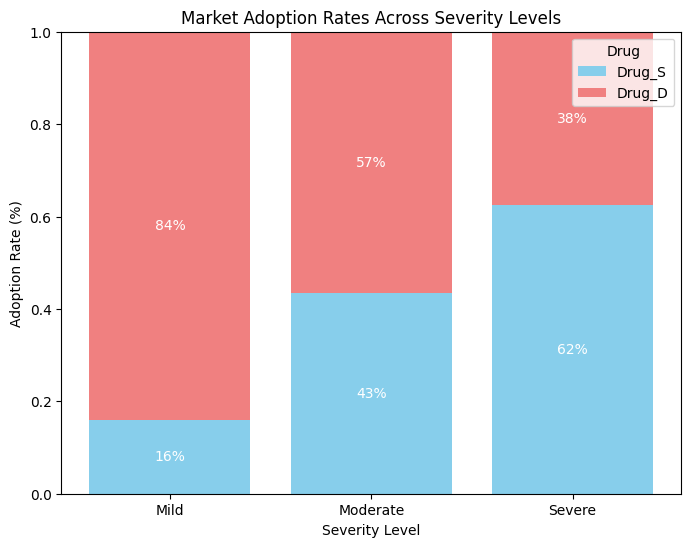

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Severity levels and adoption rates
severity_levels = adoption_rates['Severity Level']
adoption_rate_s = adoption_rates['Adoption Rate']
adoption_rate_d = 1 - adoption_rate_s  # Adoption rate for Drug_D

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(severity_levels, adoption_rate_s, label='Drug_S', color='skyblue')
ax.bar(severity_levels, adoption_rate_d, bottom=adoption_rate_s, label='Drug_D', color='lightcoral')

# Customize the chart
ax.set_ylabel('Adoption Rate (%)')
ax.set_xlabel('Severity Level')
ax.set_title('Market Adoption Rates Across Severity Levels')
ax.legend(title='Drug', loc='upper right')
ax.set_ylim([0, 1])  # Set y-axis limits to 0-1 for percentage

# Add percentage labels inside the bars (optional)
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x() + width / 2
    y = rect.get_y() + height / 2
    label_text = f'{height:.0%}'  # Format as percentage
    ax.text(x, y, label_text, ha='center', va='center', color='white')

plt.show()

In [ ]:
import pandas as pd

# Group data by severity category and drug type
drug_usage = df.groupby(['severity_category', 'drug_s'])['patid'].count().reset_index()

# Calculate percentages
drug_usage['percentage'] = drug_usage['patid'] / drug_usage.groupby('severity_category')['patid'].transform('sum') * 100

# Rename columns for clarity
drug_usage = drug_usage.rename(columns={
    'severity_category': 'Severity Category',
    'drug_s': 'Drug',
    'percentage': 'Percentage of Patients'
})

# Replace drug codes with names
drug_usage['Drug'] = drug_usage['Drug'].map({0: 'Drug_D', 1: 'Drug_S'})

print(drug_usage)

  Severity Category    Drug  patid  Percentage of Patients
0              Mild  Drug_D  15153               83.950139
1              Mild  Drug_S   2897               16.049861
2          Moderate  Drug_D     39               56.521739
3          Moderate  Drug_S     30               43.478261
4            Severe  Drug_D      3               37.500000
5            Severe  Drug_S      5               62.500000


<ipython-input-45-9feb27507eee>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drug_usage = df.groupby(['severity_category', 'drug_s'])['patid'].count().reset_index()
<ipython-input-45-9feb27507eee>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drug_usage['percentage'] = drug_usage['patid'] / drug_usage.groupby('severity_category')['patid'].transform('sum') * 100


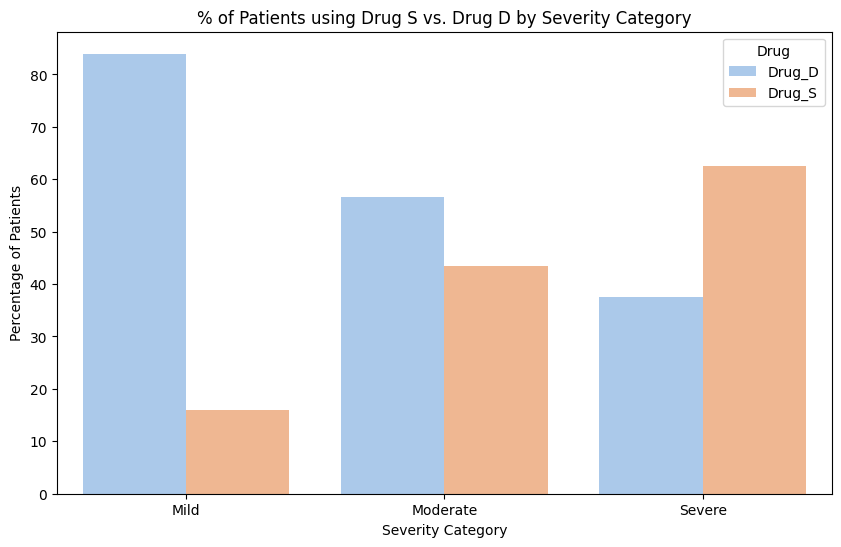

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Severity Category', y='Percentage of Patients', hue='Drug', data=drug_usage)
plt.title('% of Patients using Drug S vs. Drug D by Severity Category')
plt.ylabel('Percentage of Patients')
plt.show()